In [1]:
# import dependencies
# import sys
# !{sys.executable} -m pip install seaborn
import matplotlib as mplt
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import glacierml as gl
import numpy as np
import warnings
from tensorflow.python.util import deprecation
import os
import logging
import seaborn as sns
from tqdm import tqdm
from IPython.display import display, HTML
import geopy
from sklearn.cluster import KMeans

# display(HTML("<style>.container { width:85% !important; }</style>"))
tf.get_logger().setLevel(logging.ERROR)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
deprecation._PRINT_DEPRECATION_WARNINGS = False
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
pd.set_option('display.max_columns', None)

pd.set_option('mode.chained_assignment', None)

RS = range(0,25,1)

print('currently running tensorflow version: ' + tf.__version__)

2022-08-16 12:45:03.158038: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


currently running tensorflow version: 2.9.1


In [ ]:
df = gl.predictions_loader()

df = df[
    (df['dataframe'].str.contains('df7_')) 
    &
    (df['architecture'] == '10-5')
    &
    (df['learning rate'] == '0.010')
    &
    (df['epochs'] == '100')
]
x
df = gl.glathida_stats_adder(
    df,
    pth_1 = '/home/simonhans/data/prethicktor/regional_data/raw/',
    pth_2 = '/home/simonhans/data/prethicktor/RGI/rgi60-attribs/',
    pth_3 = '/home/simonhans/data/prethicktor/regional_data/training_data/',
)
df

# VOLUME ESTIMATE SCATTER PLOTS

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


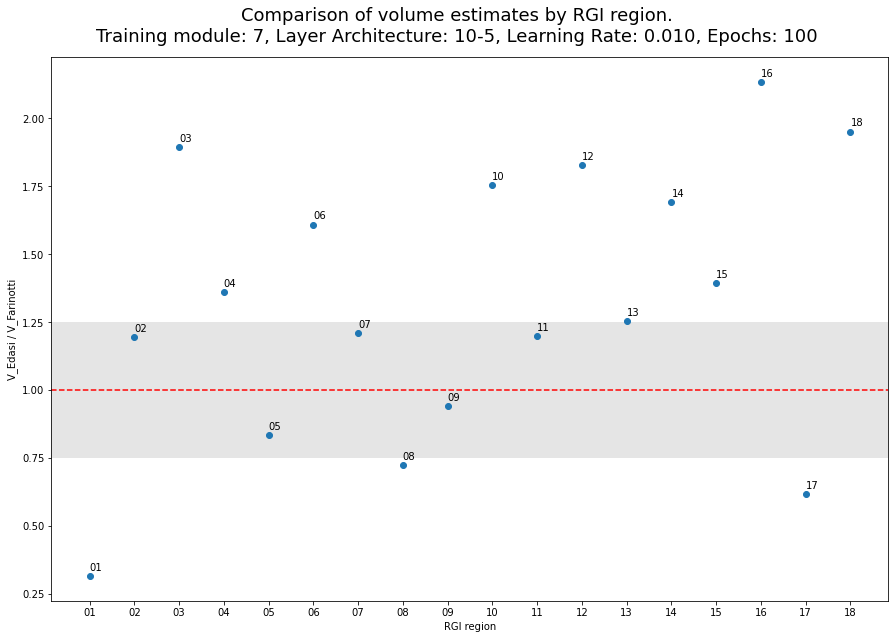

In [90]:
# volume comparisons by RGI region
dfq = df[[
    'dataframe',
    'vol',
    'volf',
    'ratio trainable',
]]
ratio = dfq.vol / dfq.volf

fig, ax = plt.subplots(1,1,figsize = (15,10))
fig.patch.set_facecolor('w')
plt.axhline(y = 1.00, color = 'red', linestyle = '--')

ax.fill_between(
    x = (-10,30),
    y1 = 1.25,
    y2 = 0.75,
    facecolor = 'gray',
    alpha = 0.2
)
# dataset.name = df['dataframe'].iloc[-1][:3]
# print(dataset.name)
arch = df['architecture'].iloc[-1]
learningrate = df['learning rate'].iloc[-1]
epochs = df['epochs'].iloc[-1]
plt.suptitle(
    'Comparison of volume estimates by RGI region.' + 
    '\nTraining module: ' + df['dataframe'].iloc[-1][2:3] +
    ', Layer Architecture: ' + df['architecture'].iloc[-1] +
    ', Learning Rate: ' + df['learning rate'].iloc[-1] +
    ', Epochs: ' + df['epochs'].iloc[-1],
    fontsize=18, y=0.95
)
ax.set(ylabel = 'V_Edasi / V_Farinotti', xlabel = 'RGI region')
plt.scatter(x = dfq['dataframe'].str[4:], y = ratio)
for i in dfq['dataframe'].index:
    plt.text(
        x = int(df['dataframe'].str[4:].loc[i]) - 1,
        y = (
            ratio.loc[i]
        ) + 0.02,
        s = df['dataframe'].str[4:].loc[i]
    )

fig.savefig('figs/Vcomparison/' + arch + '_' + str(df['dataframe'].iloc[-1][2:3])+ '_' 
            + learningrate + '_' + epochs + '.png')
fig.savefig('figs/Vcomparison/' + arch + '_' + str(df['dataframe'].iloc[-1][2:3]) + '_' 
            + learningrate + '_' + epochs + '.eps')

In [ ]:
# volume estimates by region and trainable inputs

dfq = df[[
    'dataframe',
    'vol',
    'volf',
    'ratio trainable'
]]
ratio = dfq.vol / dfq.volf

fig, ax = plt.subplots(1,1,figsize = (15,10))
fig.patch.set_facecolor('w')
plt.axhline(y = 1.00, color = 'red', linestyle = '--')
plt.suptitle('Comparison of volume estimates by trainable inputs using layer architecture ' + 
    df['architecture'].iloc[-1], fontsize=18, y=0.95)
ax.set(ylabel = 'V_Edasi / V_Farinotti', xlabel = 'Ratio of GlaThiDa glaciers in RGI')
plt.scatter(x = dfq['ratio trainable'], y = ratio)

ax.fill_between(
    x = (
        dfq['ratio trainable'].min(), dfq['ratio trainable'].max()
    ),
    y1 = 1.25,
    y2 = 0.75,
    facecolor = 'gray',
    alpha = 0.2
)
# ax.set_xscale('log')




# for i in dfq['dataframe'].index:
#     plt.text(
#         x = dfq['ratio trainable'].loc[i],
#         y = (
#             dfq['vol'] / dfq['volf'].loc[i]
#         ) + 0.02,
#         s = df['dataframe'].str[4:].loc[i]
#     )
# plt.semilogx()

# fig.savefig('figs/Vcomparison_trainable.png')
# fig.savefig('figs/Vcomparison_trainable.eps')

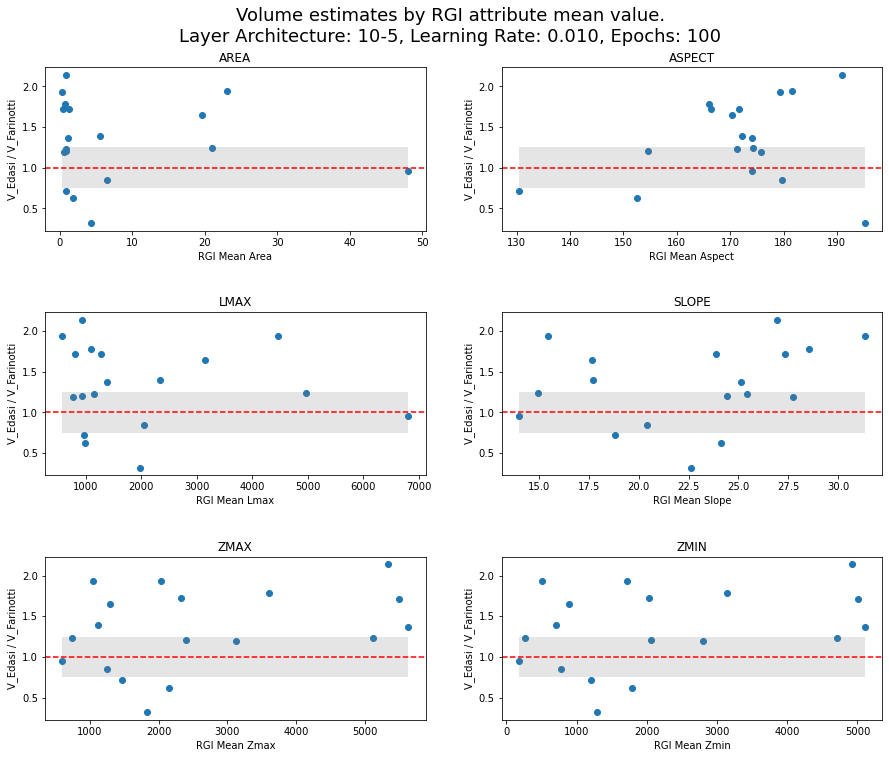

In [69]:
# volume estimates of RGI regions by RGI attribute mean value 
dfr = df[[
    'Area_RGI_mean',
    'Aspect_RGI_mean',
    'Lmax_RGI_mean',
    'Slope_RGI_mean',
    'Zmax_RGI_mean',
    'Zmin_RGI_mean'
]]

ratio = df.vol / df.volf

fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Volume estimates by RGI attribute mean value.' + 
    '\nLayer Architecture: ' + df['architecture'].iloc[-1] +
    ', Learning Rate: ' + df['learning rate'].iloc[-1] + 
    ', Epochs: ' + df['epochs'].iloc[-1], fontsize=18, y=0.95)
fig.patch.set_facecolor('w')
for n, col in enumerate(dfr.columns):
    ax = plt.subplot(3, 2, n + 1)
    dfr[dfr[col] == col].plot(ax=ax)
    
    plt.scatter(x = dfr[col], y = ratio)
    
    ax.fill_between(
        x = (
            dfr[col].min(), dfr[col].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')
    
    ax.set_title(col[:-9].upper())
    ax.get_legend().remove()
    ax.set_xlabel('RGI Mean ' + col[:-9])
    ax.set_ylabel('V_Edasi / V_Farinotti')
    
    
#     for i in dfr[col].index:
#         plt.text(
#             x = dfr[col].loc[i],
#             y = (
#                 df['vol'].loc[i] / df['volf'].loc[i]
#             ) + 0.02,
#             s = df['dataframe'].str[4:].loc[i]
#         )
# fig.savefig(
#     'figs/Vcomparison_RGI_attribute_mean_' + 
#     arch + '_' + learningrate + '_' + epochs + '.png'
# )
# fig.savefig(
#     'figs/Vcomparison_RGI_attribute_mean_' + 
#     arch + '_' + learningrate + '_' + epochs + '.eps'
# )

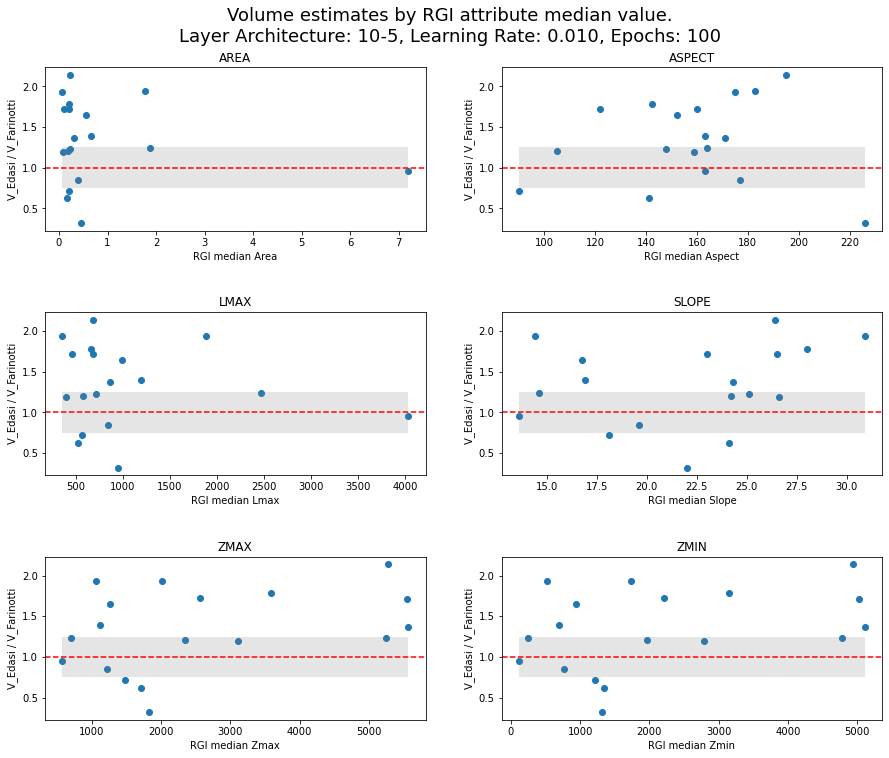

In [70]:
# volume estimates of RGI regions by RGI median attribute value 

dfs = df[[
    'vol',
    'volf'
]]
dfr = df[[
    'Area_RGI_median',
    'Aspect_RGI_median',
    'Lmax_RGI_median',
    'Slope_RGI_median',
    'Zmax_RGI_median',
    'Zmin_RGI_median'
]]
ratio = dfs.vol / dfs.volf

fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Volume estimates by RGI attribute median value.' + 
    '\nLayer Architecture: ' + df['architecture'].iloc[-1] +
    ', Learning Rate: ' + df['learning rate'].iloc[-1] +
    ', Epochs: ' + df['epochs'].iloc[-1], fontsize=18, y=0.95)
fig.patch.set_facecolor('w')
# fig.patch.set_facecolor('w')
# loop through the length of tickers and keep track of index
for n, col in enumerate(dfr.columns):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)
#     fig = plt.figure()
    # filter df and plot ticker on the new subplot axis
    dfr[dfr[col] == col].plot(ax=ax)
    plt.scatter(x = dfr[col], y = ratio)
    
    ax.fill_between(
        x = (
            dfr[col].min(), dfr[col].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')
    
    # chart formatting
    ax.set_title(col[:-11].upper())
    ax.get_legend().remove()
    ax.set_xlabel('RGI median ' + col[:-11])
    ax.set_ylabel('V_Edasi / V_Farinotti')
#     plt.xscale('log')

# fig.savefig('figs/Vcomparison_RGI_attribute_median_' + 
#             arch + '_' + learningrate + '_' + epochs + '.png'
#            )
# fig.savefig('figs/Vcomparison_RGI_attribute_median_' + 
#             arch + '_' + learningrate + '_' + epochs + '.eps'
#            )

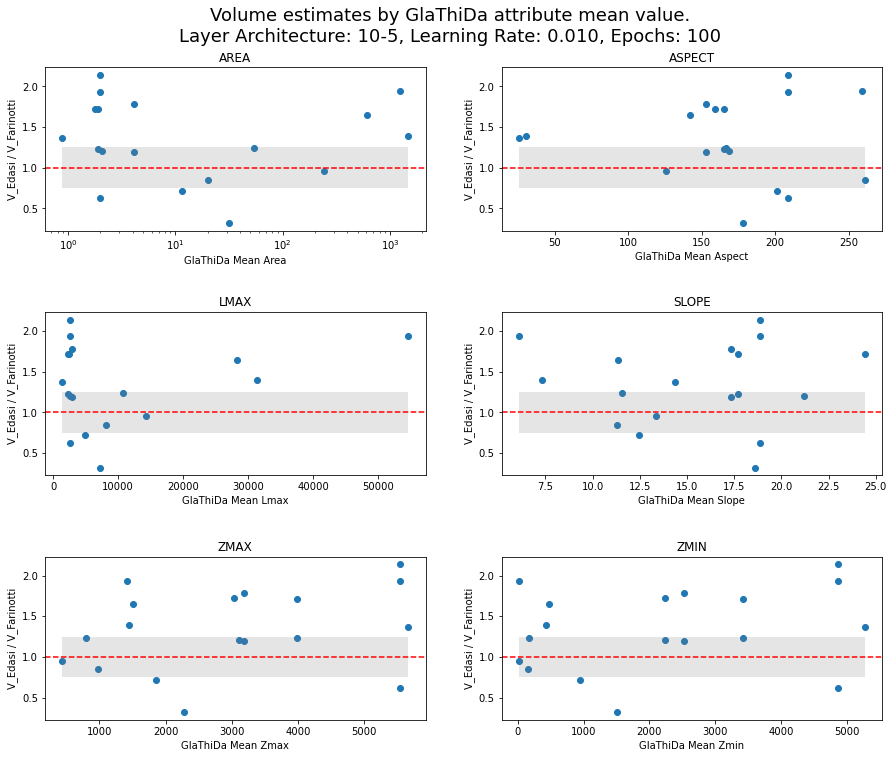

In [71]:
# volume estimates by GlaThiDa mean value for each attribute   

dfs = df[[
    'vol',
    'volf'
]]
dfr = df[[
    'Area_GlaThiDa_mean',
    'Aspect_GlaThiDa_mean',
    'Lmax_GlaThiDa_mean',
    'Slope_GlaThiDa_mean',
    'Zmax_GlaThiDa_mean',
    'Zmin_GlaThiDa_mean'
]]
ratio = dfs.vol / dfs.volf

fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Volume estimates by GlaThiDa attribute mean value.' + 
    '\nLayer Architecture: ' + df['architecture'].iloc[-1] +
    ', Learning Rate: ' + df['learning rate'].iloc[-1] + 
    ', Epochs: ' + df['epochs'].iloc[-1], fontsize=18, y=0.95)
fig.patch.set_facecolor('w')
# fig.patch.set_facecolor('w')
# loop through the length of tickers and keep track of index
for n, col in enumerate(dfr.columns):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)
#     fig = plt.figure()
    # filter df and plot ticker on the new subplot axis
    dfr[dfr[col] == col].plot(ax=ax)
    plt.scatter(x = dfr[col], y = ratio)
    
    ax.fill_between(
        x = (
            dfr[col].min(), dfr[col].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')
    
    # chart formatting
    ax.set_title(col[:-14].upper())
    ax.get_legend().remove()
    ax.set_xlabel('GlaThiDa Mean ' + col[:-14])
    ax.set_ylabel('V_Edasi / V_Farinotti')
    if col == 'Area_GlaThiDa_mean':
        plt.xscale('log')
        

# fig.savefig('figs/Vcomparison_GlaThiDa_attribute_' + 
#             arch + '_' + learningrate + '_' + epochs + '.png'
#            )
# fig.savefig('figs/Vcomparison_GlaThiDa_attribute_' + 
#             arch + '_' + learningrate + '_' + epochs + '.eps'
#            )

In [ ]:
# volume estimates by GlaThiDa median value for each attribute

dfs = df[[
    'vol',
    'volf'
]]
dfr = df[[
    'Area_GlaThiDa_median',
    'Aspect_GlaThiDa_median',
    'Lmax_GlaThiDa_median',
    'Slope_GlaThiDa_median',
    'Zmax_GlaThiDa_median',
    'Zmin_GlaThiDa_median'
]]
ratio = dfs.vol / dfs.volf

fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Volume estimates by GlaThiDa attribute median value.' + 
    '\nLayer Architecture: ' + df['architecture'].iloc[-1] +
    ', Learning Rate: ' + df['learning rate'].iloc[-1] +
    ', Epochs: ' + df['epochs'].iloc[-1], fontsize=18, y=0.95)
fig.patch.set_facecolor('w')
# fig.patch.set_facecolor('w')
# loop through the length of tickers and keep track of index
for n, col in enumerate(dfr.columns):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)
#     fig = plt.figure()
    # filter df and plot ticker on the new subplot axis
    dfr[dfr[col] == col].plot(ax=ax)
    plt.scatter(x = dfr[col], y = ratio)
    
    ax.fill_between(
        x = (
            dfr[col].min(), dfr[col].max()
        ),
        y1 = 1.25,
        y2 = 0.75,
        facecolor = 'gray',
        alpha = 0.2
    )
    
    plt.axhline(y = 1.00, color = 'red', linestyle = '--')
    
    # chart formatting
    ax.set_title(col[:-16].upper())
    ax.get_legend().remove()
    ax.set_xlabel('GlaThiDa median ' + col[:-16])
    ax.set_ylabel('V_Edasi / V_Farinotti')
    if col[:-16] == 'Area':
        
        plt.xscale('log')

# fig.savefig('figs/Vcomparison_GlaThiDa_median_' + 
#             arch + '_' + learningrate + '_' + epochs + '.png'
#            )
# fig.savefig('figs/Vcomparison_GlaThida_median_' + 
#             arch + '_' + learningrate + '_' + epochs + '.eps'
#            )

# DATASET COMPARISON SCATTER PLOTS

In [ ]:
# volume estimates against ratio of trainable glaciers in each region 

dfs = df[[
    'vol',
    'volf'
]]
dfr = df[[
    'Area_RGI_mean',
    'Aspect_RGI_mean',
    'Lmax_RGI_mean',
    'Slope_RGI_mean',
    'Zmax_RGI_mean',
    'Zmin_RGI_mean'
]]
dfr = dfr.rename(columns = {
    'Area_RGI_mean':'Area',
    'Aspect_RGI_mean':'Aspect',
    'Lmax_RGI_mean':'Lmax',
    'Slope_RGI_mean':'Slope',
    'Zmax_RGI_mean':'Zmax',
    'Zmin_RGI_mean':'Zmin'
})

dfg = df[[
    'Area_GlaThiDa_mean',
    'Aspect_GlaThiDa_mean',
    'Lmax_GlaThiDa_mean',
    'Slope_GlaThiDa_mean',
    'Zmax_GlaThiDa_mean',
    'Zmin_GlaThiDa_mean'
]]
dfg = dfg.rename(columns = {
    'Area_GlaThiDa_mean':'Area',
    'Aspect_GlaThiDa_mean':'Aspect',
    'Lmax_GlaThiDa_mean':'Lmax',
    'Slope_GlaThiDa_mean':'Slope',
    'Zmax_GlaThiDa_mean':'Zmax',
    'Zmin_GlaThiDa_mean':'Zmin'
})
ratio = dfs.vol / dfs.volf



fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Attribute comparison between GlaThiDa and RGI.' + 
    '\nLayer Architecture: ' + df['architecture'].iloc[-1] +
    ', Learning Rate: ' + df['learning rate'].iloc[-1] +
    ', Epochs: ' + df['epochs'].iloc[-1], fontsize=18, y=0.95)
fig.patch.set_facecolor('w')
# fig.patch.set_facecolor('w')
# loop through the length of tickers and keep track of index
for n, col in enumerate(dfr.columns):
#     print(list(dfg.columns.str[:-14]))
    if col in list(dfg.columns):
        
        
    # add a new subplot iteratively
        ax = plt.subplot(3, 2, n + 1)
        dfr[dfr[col] == col].plot(ax=ax)
        plt.scatter(x = dfg[col] / dfr[col], y = ratio)
        
        ax.fill_between(
            x = (
                (dfg[col] / dfr[col]).min(), (dfg[col] / dfr[col]).max()
            ),
            y1 = 1.25,
            y2 = 0.75,
            facecolor = 'gray',
            alpha = 0.2
        )

        plt.axhline(y = 1.00, color = 'red', linestyle = '--')

        # chart formatting
        ax.set_title(col.upper())
        ax.get_legend().remove()
        ax.set_xlabel('GlaThiDa mean / RGI mean ')
        ax.set_ylabel('V_Edasi / V_Farinotti')
        if col == 'Area':
            plt.xscale('log')

#         plt.semilogx()
# fig.savefig('figs/Vcomparison_GandR_attribute_mean_' + 
#             arch + '_' + learningrate + '_' + epochs + '.png'
#            )
# fig.savefig('figs/Vcomparison_GandR_attribute_mean_' + 
#             arch + '_' + learningrate + '_' + epochs + '.eps'
#            )

In [ ]:
# volume estimates against median ratio of trainable glaciers by region 

dfs = df[[
    'vol',
    'volf'
]]
dfr = df[[
    'Area_RGI_median',
    'Aspect_RGI_median',
    'Lmax_RGI_median',
    'Slope_RGI_median',
    'Zmax_RGI_median',
    'Zmin_RGI_median'
]]
dfr = dfr.rename(columns = {
    'Area_RGI_median':'Area',
    'Aspect_RGI_median':'Aspect',
    'Lmax_RGI_median':'Lmax',
    'Slope_RGI_median':'Slope',
    'Zmax_RGI_median':'Zmax',
    'Zmin_RGI_median':'Zmin'
})

dfg = df[[
    'Area_GlaThiDa_median',
    'Aspect_GlaThiDa_median',
    'Lmax_GlaThiDa_median',
    'Slope_GlaThiDa_median',
    'Zmax_GlaThiDa_median',
    'Zmin_GlaThiDa_median'
]]
dfg = dfg.rename(columns = {
    'Area_GlaThiDa_median':'Area',
    'Aspect_GlaThiDa_median':'Aspect',
    'Lmax_GlaThiDa_median':'Lmax',
    'Slope_GlaThiDa_median':'Slope',
    'Zmax_GlaThiDa_median':'Zmax',
    'Zmin_GlaThiDa_median':'Zmin'
})
ratio = dfs.vol / dfs.volf



fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Attribute comparison between GlaThiDa and RGI.' + 
    '\nLayer Architecture: ' + df['architecture'].iloc[-1] +
    ', Learning Rate: ' + df['learning rate'].iloc[-1] +
    ', Epochs: ' + df['epochs'].iloc[-1], fontsize=18, y=0.95)
fig.patch.set_facecolor('w')
# fig.patch.set_facecolor('w')
# loop through the length of tickers and keep track of index
for n, col in enumerate(dfr.columns):
#     print(list(dfg.columns.str[:-14]))
    if col in list(dfg.columns):
        
        
    # add a new subplot iteratively
        ax = plt.subplot(3, 2, n + 1)
        dfr[dfr[col] == col].plot(ax=ax)
        plt.scatter(x = dfg[col] / dfr[col], y = ratio)
        
        ax.fill_between(
            x = (
                (dfg[col] / dfr[col]).min(), (dfg[col] / dfr[col]).max()
            ),
            y1 = 1.25,
            y2 = 0.75,
            facecolor = 'gray',
            alpha = 0.2
        )

        plt.axhline(y = 1.00, color = 'red', linestyle = '--')

        # chart formatting
        ax.set_title(col.upper())
        ax.get_legend().remove()
        ax.set_xlabel('GlaThiDa median / RGI median ')
        ax.set_ylabel('V_Edasi / V_Farinotti')
        if col == 'Area':
            plt.xscale('log')

#         plt.semilogx()
# fig.savefig('figs/Vcomparison_GandR_attribute_median' + 
#             arch + '_' + learningrate + '_' + epochs + '.png')
# fig.savefig('figs/Vcomparison_GandR_attribute_median' + 
#             arch + '_' + learningrate + '_' + epochs + '.eps')

In [ ]:
# GlaThiDa mean value against RGI mean value by attribute 

dfs = df[[
    'vol',
    'volf'
]]
dfr = df[[
    'Area_RGI_mean',
    'Aspect_RGI_mean',
    'Lmax_RGI_mean',
    'Slope_RGI_mean',
    'Zmax_RGI_mean',
    'Zmin_RGI_mean'
]]
dfr = dfr.rename(columns = {
    'Area_RGI_mean':'Area',
    'Aspect_RGI_mean':'Aspect',
    'Lmax_RGI_mean':'Lmax',
    'Slope_RGI_mean':'Slope',
    'Zmax_RGI_mean':'Zmax',
    'Zmin_RGI_mean':'Zmin'
})

dfg = df[[
    'Area_GlaThiDa_mean',
    'Aspect_GlaThiDa_mean',
    'Lmax_GlaThiDa_mean',
    'Slope_GlaThiDa_mean',
    'Zmax_GlaThiDa_mean',
    'Zmin_GlaThiDa_mean'
]]
dfg = dfg.rename(columns = {
    'Area_GlaThiDa_mean':'Area',
    'Aspect_GlaThiDa_mean':'Aspect',
    'Lmax_GlaThiDa_mean':'Lmax',
    'Slope_GlaThiDa_mean':'Slope',
    'Zmax_GlaThiDa_mean':'Zmax',
    'Zmin_GlaThiDa_mean':'Zmin'
})
ratio = dfs.vol / dfs.volf

# Area = dfr['Area_GlaThiDa_mean'] / dfr['Area_RGI_mean']
# Aspect = dfr['Aspect_GlaThiDa_mean'] / dfr['Aspect_RGI_mean']
# Lmax = dfr['Lmax_GlaThiDa_mean'] / dfr['Lmax_RGI_mean']
# Slope = dfr['Slope_GlaThiDa_mean'] / dfr['Slope_RGI_mean']
# Zmax = dfr['Zmax_GlaThiDa_mean'] / dfr['Zmax_RGI_mean']
# Zmin = dfr['Zmin_GlaThiDa_mean'] / dfr['Zmin_RGI_mean']


fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Attribute comparison between GlaThiDa and RGI mean', fontsize=18, y=0.95)
fig.patch.set_facecolor('w')
# fig.patch.set_facecolor('w')
# loop through the length of tickers and keep track of index
for n, col in enumerate(dfr.columns):
#     print(list(dfg.columns.str[:-14]))
    if col in list(dfg.columns):
        
        
    # add a new subplot iteratively
        ax = plt.subplot(3, 2, n + 1)
        dfr[dfr[col] == col].plot(ax=ax)
        plt.scatter(x = dfr[col], y = dfg[col])

#         plt.axhline(y = 1.00, color = 'red', linestyle = '--')
        plt.plot(
            (dfr[col].min(), dfr[col].max()),
            (dfr[col].min(), dfr[col].max()),
            '-'
        )
        # chart formatting
        ax.set_title(col.upper())
        ax.get_legend().remove()
        ax.set_xlabel('RGI mean ' + col)
        ax.set_ylabel('GlaThiDa mean ' + col)
        if col == 'Area' or col == 'Lmax':
#             plt.xscale('log')
            plt.yscale('log')
# fig.savefig('figs/GlaThiDa_RGI_attribute_mean.png')
# fig.savefig('figs/GlaThiDa_RGI_attribute_mean.eps')

In [ ]:
# GlaThiDa median value against RGI median value by attribute 

dfs = df[[
    'vol',
    'volf'
]]
dfr = df[[
    'Area_RGI_median',
    'Aspect_RGI_median',
    'Lmax_RGI_median',
    'Slope_RGI_median',
    'Zmax_RGI_median',
    'Zmin_RGI_median'
]]
dfr = dfr.rename(columns = {
    'Area_RGI_median':'Area',
    'Aspect_RGI_median':'Aspect',
    'Lmax_RGI_median':'Lmax',
    'Slope_RGI_median':'Slope',
    'Zmax_RGI_median':'Zmax',
    'Zmin_RGI_median':'Zmin'
})

dfg = df[[
    'Area_GlaThiDa_median',
    'Aspect_GlaThiDa_median',
    'Lmax_GlaThiDa_median',
    'Slope_GlaThiDa_median',
    'Zmax_GlaThiDa_median',
    'Zmin_GlaThiDa_median'
]]
dfg = dfg.rename(columns = {
    'Area_GlaThiDa_median':'Area',
    'Aspect_GlaThiDa_median':'Aspect',
    'Lmax_GlaThiDa_median':'Lmax',
    'Slope_GlaThiDa_median':'Slope',
    'Zmax_GlaThiDa_median':'Zmax',
    'Zmin_GlaThiDa_median':'Zmin'
})
ratio = dfs.vol / dfs.volf

# Area = dfr['Area_GlaThiDa_median'] / dfr['Area_RGI_median']
# Aspect = dfr['Aspect_GlaThiDa_median'] / dfr['Aspect_RGI_median']
# Lmax = dfr['Lmax_GlaThiDa_median'] / dfr['Lmax_RGI_median']
# Slope = dfr['Slope_GlaThiDa_median'] / dfr['Slope_RGI_median']
# Zmax = dfr['Zmax_GlaThiDa_median'] / dfr['Zmax_RGI_median']
# Zmin = dfr['Zmin_GlaThiDa_median'] / dfr['Zmin_RGI_median']


fig = plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle('Attribute comparison between GlaThiDa and RGI median', fontsize=18, y=0.95)
fig.patch.set_facecolor('w')
# fig.patch.set_facecolor('w')
# loop through the length of tickers and keep track of index
for n, col in enumerate(dfr.columns):
#     print(list(dfg.columns.str[:-14]))
    if col in list(dfg.columns):
        
        
    # add a new subplot iteratively
        ax = plt.subplot(3, 2, n + 1)
        dfr[dfr[col] == col].plot(ax=ax)
        plt.scatter(x = dfr[col], y = dfg[col])

#         plt.axhline(y = 1.00, color = 'red', linestyle = '--')
        plt.plot(
            (dfr[col].min(), dfr[col].max()),
            (dfr[col].min(), dfr[col].max()),
            '-'
        )
        # chart formatting
        ax.set_title(col.upper())
        ax.get_legend().remove()
        ax.set_xlabel('RGI median ' + col)
        ax.set_ylabel('GlaThiDa median ' + col)
        if col == 'Area' or col == 'Lmax':
#             plt.xscale('log')
            plt.yscale('log')
# fig.savefig('figs/GlaThiDa_RGI_attribute_median.png')
# fig.savefig('figs/GlaThiDa_RGI_attribute_median.eps')

In [ ]:
# iqr against median plots for each reagion
training_data = gl.data_loader()
training_data = training_data[[
    'Area',
    'Aspect',
    'Lmax',
    'Slope',
    'Zmin',
    'Zmax'
    
]]
arch = df['architecture'].iloc[-1]

q3, q1 = np.percentile(training_data,[75, 25], axis = 0)
iqr = q3 - q1
medians = np.median(training_data,axis=0)
iqr.shape
fig,ax=plt.subplots(figsize=(20,20))
fig.patch.set_facecolor('w')
plt.suptitle(
    'Comparisons of medians and IQR using architecture using architecture ' + arch,
    fontsize=18, y=0.95
)
for n, i in enumerate(range(0, 6)):
    ax = plt.subplot(3, 2, n + 1)
    col_name = training_data.columns[i]
    
    plt.plot(iqr[i],medians[i],'*')
    plt.scatter(
        df[col_name + '_RGI_iqr'],
        df[col_name + '_RGI_median'],
        marker = 's',
        c = df['voldiff'],
        cmap = 'viridis'
    )
    ax.set_xlabel(col_name + ' IQR')
    ax.set_ylabel(col_name + ' Median')
    ax.set_title(col_name + ' IQR against Median ' + col_name)
    plt.plot((df[col_name + '_RGI_iqr'].min(),df[col_name + '_RGI_iqr'].max()),np.median(
        df[col_name + '_RGI_iqr']) * np.array((1,1))
    )
    
    plt.plot(
        np.median(df[col_name + '_RGI_iqr']) * np.array((1,1)),
        (df[col_name + '_RGI_iqr'].min(),df[col_name + '_RGI_median'].max())
    )
    for i in df.index:
        plt.text(
            x = df[col_name + '_RGI_iqr'].loc[i] + 0.02,
            y = (
                df[col_name + '_RGI_median'].loc[i]) + 0.02,
            s = df['dataframe'].str[4:].loc[i] 
        )
# plt.savefig(
#     'figs/iqr_median' + 
#     arch + '.eps'
# )


# plt.savefig(
#     'figs/iqr_median_' + 
#     arch + '.png'
# )